# Deceision Tree - Regression

Decision Trees are **versatile as they can perform both Classification and Regression**.

In this notebook we will train a Decision tree to perform Regression. Then, we will train a Random Forest on the same dataset to compare the performance.

In the previous notebooks on Linear and Polynomial regression we experimented with the Red Wine quality dataset. The performance of those models were **not very good**. 

In this notebook our goal is to see if we can improve the regression performance on the same dataset by using Decision Tree and Random Forest.


## Decesion Tree Regression Algorithm

For solving regression problems, Decision Tree uses the same algorithm that it uses for classification problems, namely the **Classification And Regression Tree (CART)** algorithm.

The only difference is that it splits the training set to minimize the **Mean-Squared Error (MSE)**, instead of impurity.


## Experiments.

We will perform four experiments.

1. Decision Tree Regression
2. Random Forest Regression
3. Linear Regression by using the Ordinary Least Squared (OLS) technique
4. Polynomial Regression (Regularized)


### Dataset

URL: https://archive.ics.uci.edu/ml/datasets/wine+quality

The dataset is related to the **Red** variants of the Portuguese "Vinho Verde" wine. It provides the physicochemical (inputs) and sensory (the output) variables are available.

The dataset consists of characteristics of white wine (e.g., alcohol content, density, amount of citric acid, pH, etc) with target variable "quality" representing rating of wine.


Given the characteristics of a new, unlabeled wine, the regression task is to predict its "quality".

Input variables (based on physicochemical tests):
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

Output variable (based on sensory data): 
- quality 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Load Data

First load the data and explore the feature names, target names, etc.

In [2]:
df = pd.read_csv('/Users/hasan/datasets/winequality-red.csv')

# Quick Check of the Data

Let’s take a look at the top five rows using the DataFrame’s head() method.


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Description of the Data

DataFrame’s info() method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Dimension the Data

We need to know the dimension (number of rows and columns) of the data using DataFrame's shape method.

In [5]:
print("Dimension of the data: ", df.shape)

no_of_rows = df.shape[0]
no_of_columns = df.shape[1]

print("No. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)

Dimension of the data:  (1599, 12)
No. of Rows: 1599
No. of Columns: 12


# Visualization of Data

Plot a histogram for each numerical attribute. 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23d8ba90>,
      dtype=object)

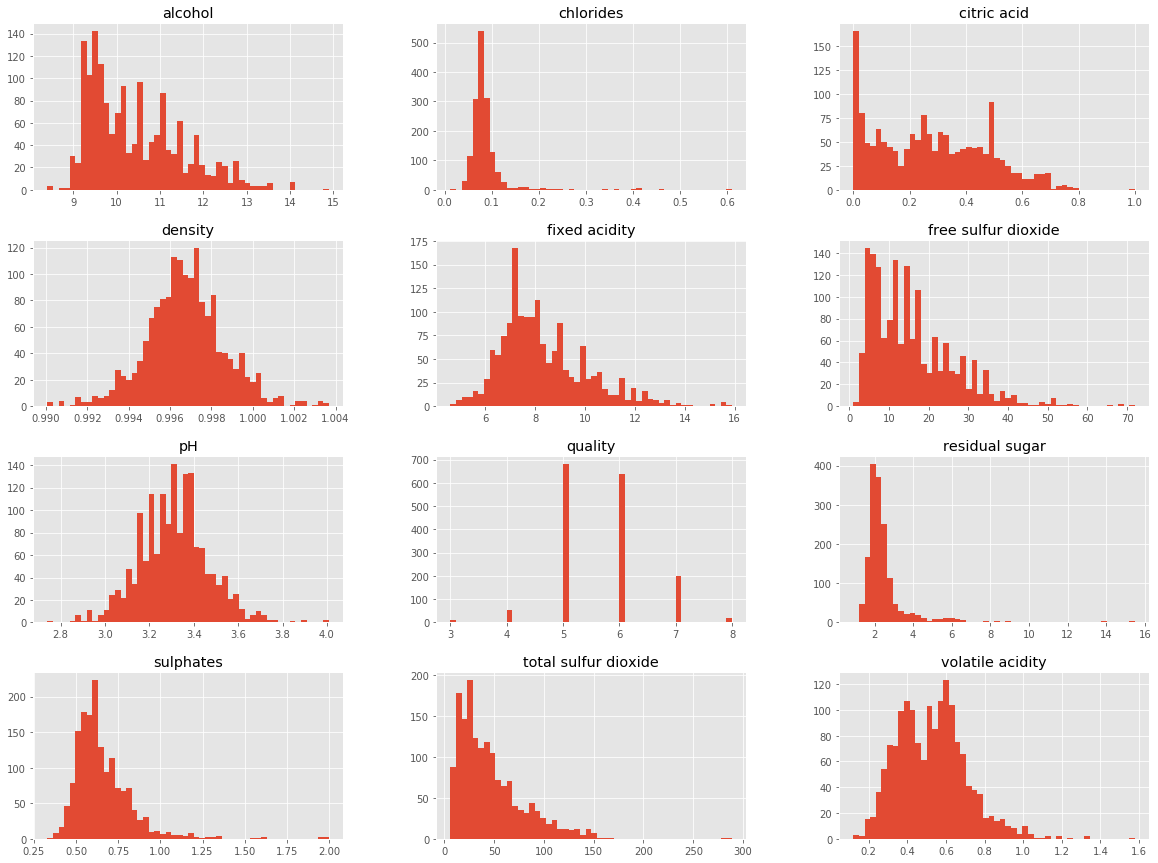

In [6]:
df.hist(bins=50, figsize=(20,15)) 

# Visualize the Target


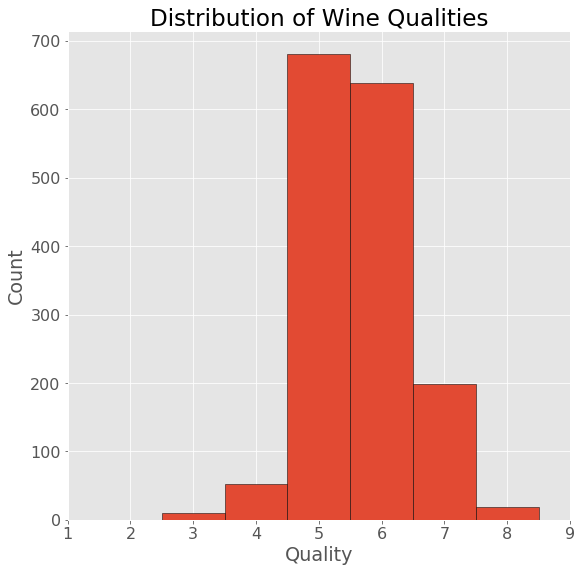

In [7]:
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (9, 9)

# Bar plot of grades
plt.bar(df['quality'].value_counts().index, 
        df['quality'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Quality'); 
plt.ylabel('Count'); 
plt.title('Distribution of Wine Qualities');
plt.xticks(list(range(1, 10)));

# Explore The Target

In [8]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Create a Separate Feature Set (Data Matrix X) and Target (1D Vector y)

Create a data matrix (X) that contains all features and a 1D target vector (y) containing the target.



In [9]:
# It contains all attributes (all features and the target)
allData = df


# Use the following code to select ALL features
X = df.drop(columns='quality')  # Data Matrix containing all features excluding the target


y = df['quality'] # 1D targer vector

print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


# Create Train and Test Dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Evaluation Metrics

We will use two evaluation metrics.

- Mean Squared Error (MSE)
- Coefficient of Determination or $R^2$/$r^2$


### Note on $R^2$:
R-squared is a statistical measure of how close the data are to the fitted regression line. 

R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

- 0% indicates that the model explains none of the variability of the response data around its mean.
- 100% indicates that the model explains all the variability of the response data around its mean.

In general, the higher the R-squared, the better the model fits your data. 

#### Compute $R^2$ using the sklearn:

- The "score" function of the OLS Linear Regression object
- The "r2_score" function from sklearn.metrics

#### Compute MSE using the sklearn:

- The "mean_squared_error" function from sklearn.metrics


# Experiment 1: Decision Tree Regression


### Model Selection: Hyperparameter Tuning

To find the optimal Decision Tree Regressor we perform model selection.

We use grid search to find the optimal hyperparameters.

We tune the following two hyperparameters that influence variance (overfitting).

- min_samples_leaf
- max_depth
- min_samples_split

In [11]:
%%time

param_grid = {'min_samples_leaf': [8, 10, 12, 15, 18, 20],
              'max_depth': [2, 4, 6, 7, 8, 12],
              'min_samples_split': [15, 20, 25, 30, 35]}

dt_reg = DecisionTreeRegressor()

dt_reg_cv = GridSearchCV(dt_reg, param_grid, scoring='neg_mean_squared_error', cv=10, verbose=1, n_jobs=-1)
dt_reg_cv.fit(X_train, y_train)

params_optimal = dt_reg_cv.best_params_

print("Best Score (accuracy): %f" % dt_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s


Best Score (accuracy): -0.444159
Optimal Hyperparameter Values:  {'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 20}


CPU times: user 1.67 s, sys: 195 ms, total: 1.86 s
Wall time: 5.57 s


[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:    5.5s finished


## Experiment 1: Train Optimal Decesion Tree Regressor

In [12]:
tree_reg = DecisionTreeRegressor(**params_optimal, random_state=42)

tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=15,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

## Experiment 1: Evaluate Optimal Decision Tree Regressor on Test Data

In [13]:
# Make prediction using the test data
y_test_predicted = tree_reg.predict(X_test)

mse_decision_tree = mean_squared_error(y_test, y_test_predicted)

print("Mean squared error: %.2f"
      % mse_decision_tree)

# Explained variance score: 1 is perfect prediction
r2_decision_tree = r2_score(y_test, y_test_predicted)
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_decision_tree)

Mean squared error: 0.43
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.34


# Experiment 2: Random Forest Regressor

We did not perform hyperparameter tuning. Instead we experimented with the hyperparameter values and derived near-optimal values. 

Ideally we should have performed a grid search for hyperparameter tuning.

In [14]:
rnd_forest_reg = RandomForestRegressor(n_estimators=1000, criterion="mse", max_features="auto", max_depth=15, 
                                       oob_score=True, verbose=1, n_jobs=-1)

rnd_forest_reg.fit(X_train, y_train)

y_test_predicted_rf = rnd_forest_reg.predict(X_test)

mse_random_forest = mean_squared_error(y_test, y_test_predicted_rf)
print("\nMean squared error: %.2f"
      % mse_random_forest)

# Explained variance score: 1 is perfect prediction
r2_random_forest = r2_score(y_test, y_test_predicted_rf)
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_random_forest)

print("\nScore of the training dataset obtained using an out-of-bag estimate: ", rnd_forest_reg.oob_score_)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.1s finished



Mean squared error: 0.31
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.52

Score of the training dataset obtained using an out-of-bag estimate:  0.4711218035961001


# Experiment 3: Linear Regression (OLS)

In [15]:
# Create the OLS linear regression object
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)


# Make prediction on test data
y_test_predicted = lin_reg.predict(X_test)


mse_ols = mean_squared_error(y_test, y_test_predicted)
print("\nMean squared error: %.2f"
      % mse_ols)


# Explained variance score: 1 is perfect prediction
r2_ols = r2_score(y_test, y_test_predicted)
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_ols)


Mean squared error: 0.39
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.40


# Experiment 4: Polynomial Regression

In [16]:
# Ridge Regression

# Variable that speficies the degree of the polynomial to be added to the feature vector
poly_degree = 2


# Add polynomial terms with the feature vector using the sklearn PolynomialFeatures class
poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)


# Create Ridge linear regression object
lin_reg_ridge = Ridge(alpha=1.0, solver="cholesky")

# Train the model
lin_reg_ridge.fit(X_train_poly, y_train)


# Make prediction on Test data
y_test_predicted_ridge = lin_reg_ridge.predict(X_test_poly)



mse_ridge = mean_squared_error(y_test, y_test_predicted_ridge)
print("\nMean squared error: %.2f"
      % mse_ridge)


# Explained variance score: 1 is perfect prediction
r2_ridge = r2_score(y_test, y_test_predicted_ridge)
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_ridge)


Mean squared error: 0.37
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.43


## Summary of Results from 4 Experiments

In [17]:
data = [["Decision Tree Regressor", mse_decision_tree, r2_decision_tree], 
        ["Random Forest Regressor", mse_random_forest, r2_random_forest], 
        ["Linear Regression (OLS)", mse_ols, r2_ols],
        ["Polynomial Regression", mse_ridge, r2_ridge]]

pd.DataFrame(data, columns=["Regressor", "MSE", "R^2 Score"])

,Regressor,MSE,R^2 Score
0,Decision Tree Regressor,0.433848,0.336122
1,Random Forest Regressor,0.312840,0.521289
2,Linear Regression (OLS),0.390025,0.403180
3,Polynomial Regression,0.374164,0.427451


## Comparative Understanding


We have done 4 experiments by using 4 different regressors on a complex dataset.

- Performance of Decision Tree is not better than Linear & Polynomial Regression models.
- Random Forest Regressor **outperforms other regressors**. 

